# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [9]:
# !pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [10]:
penguin_data = load_penguins().dropna(subset=['bill_depth_mm'])

categorical_features = ['species', 'island', 'sex']
data_encoded = pd.get_dummies(penguin_data, columns=categorical_features, drop_first=True)

features = data_encoded.drop(columns=['bill_depth_mm'])
target = data_encoded['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

feature_sets = {
    "Simple": ['bill_length_mm', 'flipper_length_mm'],
    "Moderate": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    "Complex": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year'],
    "Full Model": features.columns.tolist()
}

train_mse_list = []
test_mse_list = []

for model_name, selected_features in feature_sets.items():
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    model_pipeline = make_pipeline(
        StandardScaler(),
        LinearRegression()
    )

    model_pipeline.fit(X_train_subset, y_train)
    train_predictions = model_pipeline.predict(X_train_subset)
    test_predictions = model_pipeline.predict(X_test_subset)

    train_mse_list.append(mean_squared_error(y_train, train_predictions))
    test_mse_list.append(mean_squared_error(y_test, test_predictions))

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

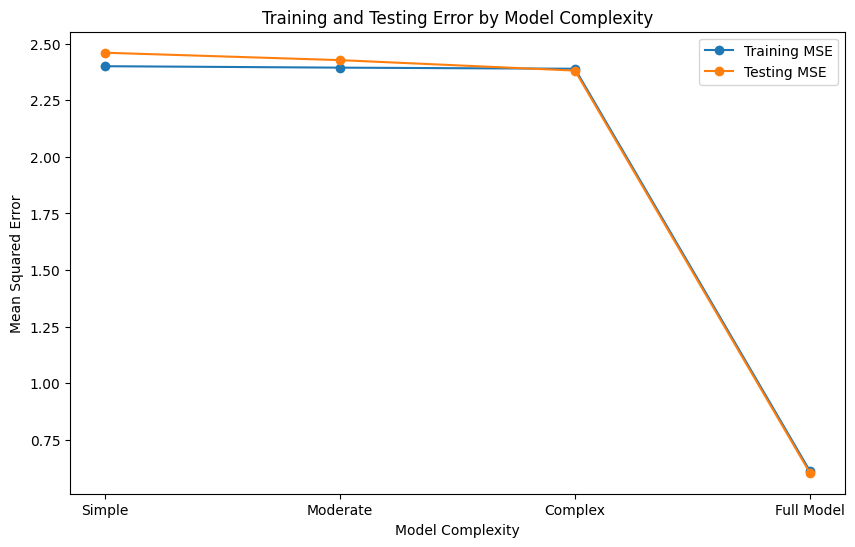

In [11]:
plt.figure(figsize=(10, 6))
model_labels = list(feature_sets.keys())
plt.plot(model_labels, train_mse_list, label="Training MSE", marker='o')
plt.plot(model_labels, test_mse_list, label="Testing MSE", marker='o')
plt.xlabel("Model Complexity")
plt.ylabel("Mean Squared Error")
plt.title("Training and Testing Error by Model Complexity")
plt.legend()
plt.show()

The best model is the full model because it has the smallest MSE.